In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown
np.random.seed(70) #for reproducibility

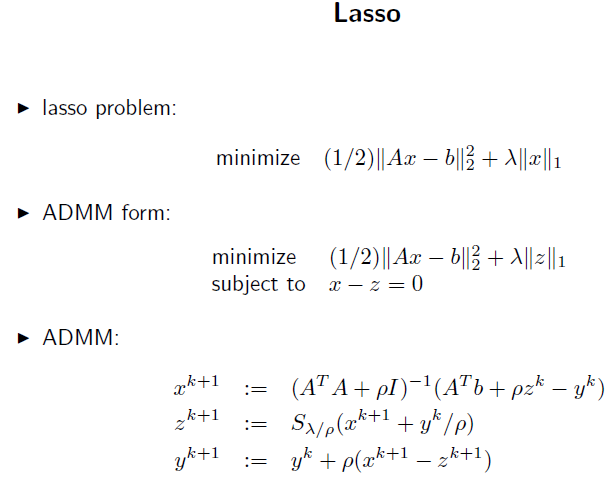

**Lasso Problem:**
$ \frac{1}{2} \| \mathbf{A}\mathbf{x} - \mathbf{b} \|_2^2 + \lambda \| \mathbf{x} \|_1$

**ADMM standard format:**   
Minimize:
$ f(x) + g(x)$

Subject to:
$ Ax + Bz = c$


**Lasso Problem in ADMM format:**\
Minimize:\
$ \mathbf{ \frac{1}{2} \| Ax - b \|_2^2 + \lambda \| z \|_1 } $

Subject to:\
$ \mathbf{ x - z = 0 } $

**Where:**\
$ \mathbf{A} \in \mathbb{R}^{Nb \times Nx} $ \
$ \mathbf{x} \in \mathbb{R}^{Nx} $ \
$ \mathbf{b} \in \mathbb{R}^{Nb} $ \
$ \mathbf{z} \in \mathbb{R}^{Nx} $

In [22]:
Nb = 5000 # Size of vector b
Nx = 1500 # Size of vector x
roh = 1
A = np.random.normal(0, 1, (Nb, Nx)) # Mean=0, Stddev=1, Shape=(Nb,Nx)
b = np.random.normal(0, 1, Nb) # Mean=0, Stddev=1, Shape=(Nb,1)
print("A shape: ", A.shape)
print("b shape: ", b.shape)
x_init = np.random.normal(0, 1, Nx)
z_init = np.random.normal(0, 1, Nx)

# Dual variable y represents the lagrange multiplier
y_init = np.random.rand(Nx) # Uniform distribution range [0,1)

# Lambda is the regularization parameter for Lasso
# Do not confuse this with lagrange multiplier y
lambd = 1e-2

A shape:  (5000, 1500)
b shape:  (5000,)


In [23]:
x = x_init
z = z_init
y = y_init
primal_res = []
dual_res = []
iters = np.arange(0, 800) # max number of iterations

# (A.T * A + roh * I)^(-1)
cached_inv = np.linalg.inv((np.matmul(A.T, A) + roh*np.identity(Nx))) # O(n^3)

for k in iters:
    x = np.matmul(cached_inv, np.matmul(A.T, b) + roh*z - y)
    z = np.sign(x) * np.maximum(np.abs(x) - lambd / roh, 0) # soft thresholding
    z_prev = z
    y = y + roh * (x - z)

    primal_res.append(np.linalg.norm(x - z))
    dual_res.append(roh * np.linalg.norm(z - z_prev))
    print("Dual residual: ", dual_res[-1])

Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0
Dual residual:  0.0


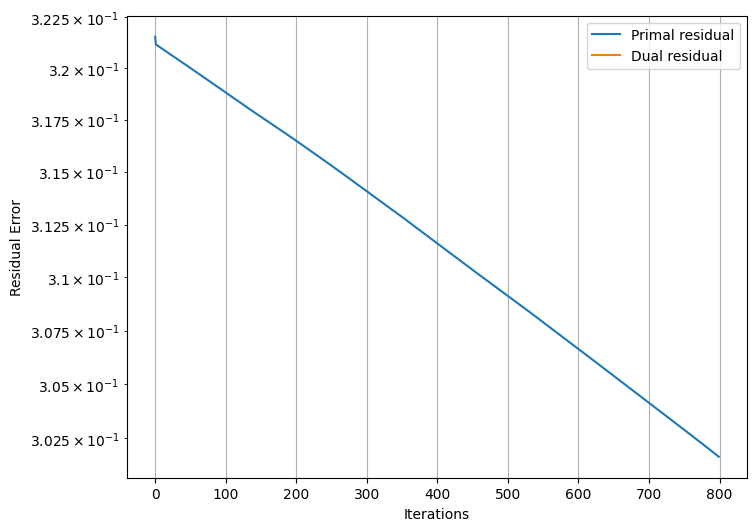

In [24]:
plt.figure(figsize=(8,6))
plt.plot(primal_res, label="Primal residual")
plt.plot(dual_res, label="Dual residual")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual Error")
plt.legend()
plt.grid()